In [55]:
import json
with open("page_stats.json") as f:
    page_stats = json.load(f)

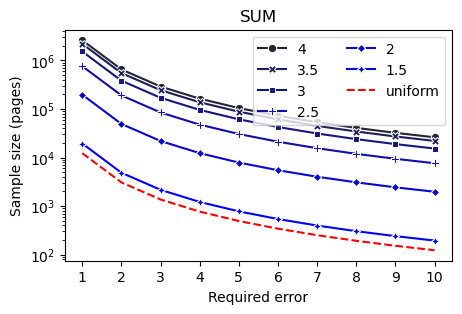

In [64]:
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np
import seaborn as sns
import pandas as pd
sns.set_palette(palette="dark:b")

# plot sum
y_data = {}
e = np.linspace(0.01, 0.1, 10)
for i, z in enumerate(reversed(page_stats)):
    if z == "uniform":
        continue
    assert isinstance(z, str)
    cov = page_stats[z]['sum']
    z = z.replace("_", ".")
    page_size_fn = lambda e: (scipy.stats.norm.ppf(0.975) * cov / e)**2
    page_sizes = [page_size_fn(ee) for ee in e]
    y_data[z] = page_sizes
# line plot with seaborn
plt.figure(figsize=(5, 3))
df = pd.DataFrame(y_data, index=e*100)
sns.lineplot(data=df, dashes=False, markers=True)
uniform_cov = page_stats['uniform']['sum']
page_size_fn = lambda e: (scipy.stats.norm.ppf(0.975) * uniform_cov / e)**2
page_sizes = [page_size_fn(ee) for ee in e]
plt.plot(e*100, page_sizes, label="uniform", linestyle="--", color="red")
plt.yscale("log")
plt.legend(ncol=2)
plt.ylabel("Sample size (pages)")
plt.xlabel("Required error")
plt.xticks(e*100)
plt.title("SUM")
plt.show()

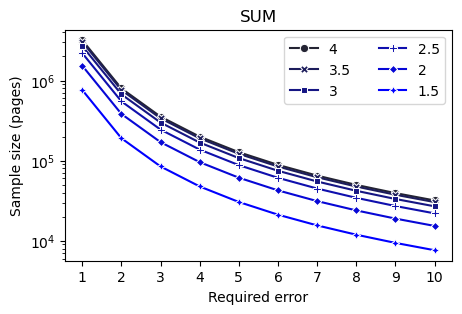

In [66]:
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np
import seaborn as sns
import pandas as pd
sns.set_palette(palette="dark:b")

# plot sum
y_data = {}
e = np.linspace(0.01, 0.1, 10)
for i, z in enumerate(reversed(page_stats)):
    if z == "uniform":
        continue
    assert isinstance(z, str)
    cov = page_stats[z]['cnt']
    z = z.replace("_", ".")
    page_size_fn = lambda e: (scipy.stats.norm.ppf(0.975) * cov / e)**2
    page_sizes = [page_size_fn(ee) for ee in e]
    y_data[z] = page_sizes
# line plot with seaborn
plt.figure(figsize=(5, 3))
df = pd.DataFrame(y_data, index=e*100)
sns.lineplot(data=df, dashes=False, markers=True)
uniform_cov = page_stats['uniform']['cnt']
page_size_fn = lambda e: (scipy.stats.norm.ppf(0.975) * uniform_cov / e)**2
page_sizes = [page_size_fn(ee) for ee in e]
# plt.plot(e*100, page_sizes, label="uniform", linestyle="--", color="red")
plt.yscale("log")
plt.legend(ncol=2)
plt.ylabel("Sample size (pages)")
plt.xlabel("Required error")
plt.xticks(e*100)
plt.title("SUM")
plt.show()